In [1]:
import numpy as np
print(np.__version__)

1.24.4


In [2]:
import numpy as np
import pandas as pd
import duckdb
import sqlalchemy
import matplotlib.pyplot as plt
import geopandas as gpd
from pandas_gbq import read_gbq

In [55]:
project_id = "projectm2-aiess"
query = "SELECT * FROM olist_brazilian_ecommerce_target.DIM_CUSTOMERS"
df_customers = read_gbq(query, project_id=project_id)
query2 = "SELECT * FROM olist_brazilian_ecommerce_target.FCT_PAYMENTS"
df_payments = read_gbq(query2, project_id=project_id)
query3 = "SELECT * FROM olist_brazilian_ecommerce_target.FCT_REVIEWS"
df_reviews = read_gbq(query3, project_id=project_id)
query4 = "SELECT * FROM olist_brazilian_ecommerce_DS.DS_land_geolocation"
df_geolocation_land = read_gbq(query4, project_id=project_id)
query5 = "SELECT * FROM olist_brazilian_ecommerce_target.FCT_ORDER_ITEMS"
df_items =  read_gbq(query5, project_id=project_id)
query6 = "SELECT * FROM olist_brazilian_ecommerce_target.DIM_DATE"
df_date = read_gbq(query6, project_id=project_id)
query7 = "SELECT * FROM olist_brazilian_ecommerce_target.DIM_ORDERS"
df_orders = read_gbq(query7, project_id=project_id)
query8 = "SELECT * FROM olist_brazilian_ecommerce_DS.DS_orders_full_profits"
df_orders_full = read_gbq(query8, project_id=project_id)

Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|


In [56]:
df_customers.head()

,pk_customer_sid,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,load_date
0,717a3a9459f9006f23e24a684be8408b,5203034a29c3d294713bf8ccbd5d05a6,69900,rio branco,AC,2025-06-17 10:02:59 AM
1,31dbc13addc753e210692eacaea065e4,5dbba6c01268a8ad43f79157bf4454a0,69900,rio branco,AC,2025-06-17 10:02:59 AM
2,5880e46677c68394bda62479fd673340,5dbba6c01268a8ad43f79157bf4454a0,69900,rio branco,AC,2025-06-17 10:02:59 AM
3,cd281c1a7d26cd29a3ed4b029fce7270,086d6b5b5ba195a91aa0a6ec8e75d1a4,69900,rio branco,AC,2025-06-17 10:02:59 AM
4,888d2ebe1af2a8c93c75dae5dfc23719,721d1092e1a6460c67e6a0e691d899a3,69900,rio branco,AC,2025-06-17 10:02:59 AM


In [57]:
df_items.head()

,fk_order_sid,pk_order_id,pk_order_item_id,fk_shipping_limit_date_sid,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,...,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,load_date
0,7f39ba4c9052be115350065d07583cac,7f39ba4c9052be115350065d07583cac,1,20171024,a2ff5a97bf95719e38ea2e3b4105bce8,0015a82c2db000af6aaaf3ae2ecb0532,2017-10-24 23:56:20+00:00,895.0,21.02,eletroportateis,...,849,2,11800,40,43,36,09080,santo andre,SP,2025-06-17 10:03:19 AM
1,9dc8d1a6f16f1b89874c29c9d8d30447,9dc8d1a6f16f1b89874c29c9d8d30447,1,20171018,a2ff5a97bf95719e38ea2e3b4105bce8,0015a82c2db000af6aaaf3ae2ecb0532,2017-10-18 14:49:22+00:00,895.0,21.02,eletroportateis,...,849,2,11800,40,43,36,09080,santo andre,SP,2025-06-17 10:03:19 AM
2,d455a8cb295653b55abda06d434ab492,d455a8cb295653b55abda06d434ab492,1,20171012,a2ff5a97bf95719e38ea2e3b4105bce8,0015a82c2db000af6aaaf3ae2ecb0532,2017-10-12 22:24:16+00:00,895.0,21.02,eletroportateis,...,849,2,11800,40,43,36,09080,santo andre,SP,2025-06-17 10:03:19 AM
3,b3ef4de1762699288ca5c55a1e574a12,b3ef4de1762699288ca5c55a1e574a12,2,20170712,08574b074924071f4e201e151b152b4e,001cca7ae9ae17fb1caed9dfb1094831,2017-07-12 20:15:26+00:00,89.0,37.92,ferramentas_jardim,...,450,1,9000,42,12,39,29156,cariacica,ES,2025-06-17 10:03:19 AM
4,c17d6a9708cfd25cb90e960da4123e07,c17d6a9708cfd25cb90e960da4123e07,1,20171018,08574b074924071f4e201e151b152b4e,001cca7ae9ae17fb1caed9dfb1094831,2017-10-18 15:45:38+00:00,99.0,33.08,ferramentas_jardim,...,450,1,9000,42,12,39,29156,cariacica,ES,2025-06-17 10:03:19 AM


In [59]:
def check_one_to_one_mapping(df, key_col, value_cols):
    combo_counts = df.groupby(key_col)[value_cols].nunique()

    # Keep rows where there's more than 1 unique combinations for any value_col
    inconsistent_keys = combo_counts[(combo_counts > 1).any(axis=1)]

    if not inconsistent_keys.empty:
        print(f" {key_col} has non-unique combinations of {value_cols} :")
        return df[df[key_col].isin(inconsistent_keys.index)].sort_values(key_col)
    else:
        print(f"Each '{key_col}' maps uniquely to combinations of {value_cols}.")


In [60]:
check_one_to_one_mapping(df_geolocation_land,"geolocation_zip_code_prefix", ["geolocation_lat", "geolocation_lng"] )

 geolocation_zip_code_prefix has non-unique combinations of ['geolocation_lat', 'geolocation_lng'] :


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,load_date
561316,01001,-23.549292,-46.633559,sao paulo,SP,2025-06-17 10:03:07 AM
561323,01001,-23.551427,-46.634074,sao paulo,SP,2025-06-17 10:03:07 AM
561322,01001,-23.549825,-46.633970,sao paulo,SP,2025-06-17 10:03:07 AM
561321,01001,-23.550642,-46.634410,sao paulo,SP,2025-06-17 10:03:07 AM
561320,01001,-23.549698,-46.633909,sao paulo,SP,2025-06-17 10:03:07 AM
...,...,...,...,...,...,...
177904,99980,-28.418178,-51.779942,david canabarro,RS,2025-06-17 10:03:07 AM
177892,99980,-28.388932,-51.846871,david canabarro,RS,2025-06-17 10:03:07 AM
177902,99980,-28.387059,-51.848964,david canabarro,RS,2025-06-17 10:03:07 AM
349788,99990,-28.329718,-51.769615,muliterno,RS,2025-06-17 10:03:07 AM


It appears that one zip code can have different combinations of longtitude latittude, source states that the zip code is the first 5 digits.

Therefore, mean of longtitude and latitude will be used as variables for heatmaps for this dataset

<div class="alert alert-block alert-info">
Exploration of data:

In [61]:
#get buyer city + orders in df
orders_customers = pd.merge(
    df_orders,
    df_customers,
    how='left',
    left_on='fk_customer_sid',
    right_on='pk_customer_sid'
)

In [62]:
orders_customers.columns

Index(['pk_order_sid', 'fk_customer_sid', 'fk_order_purchased_date_sid',
       'fk_order_approved_at_date_sid', 'fk_order_delivered_carrier_date_sid',
       'fk_order_delivered_customer_date_sid',
       'fk_order_estimated_delivery_date_sid', 'order_status', 'total_payment',
       'order_amt', 'freight_amt', 'total_order_amt_wf_freight', 'balance_amt',
       'payment_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'load_date_x', 'pk_customer_sid',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'load_date_y'],
      dtype='object')

In [63]:
orders_customers['order_purchase_timestamp'] = pd.to_datetime(orders_customers['order_purchase_timestamp'])
orders_customers['year_month'] = orders_customers['order_purchase_timestamp'].dt.to_period('M')

/tmp/ipykernel_137720/2812370479.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  orders_customers['year_month'] = orders_customers['order_purchase_timestamp'].dt.to_period('M')


In [64]:
monthly_city_sales = orders_customers.groupby(['customer_city', 'year_month'])['total_payment'].sum().reset_index()

In [65]:
monthly_city_sales['year_month'].value_counts().sort_index(ascending=False)

year_month
2018-10       4
2018-09      11
2018-08    1176
2018-07    1239
2018-06    1171
2018-05    1200
2018-04    1274
2018-03    1330
2018-02    1301
2018-01    1397
2017-12    1155
2017-11    1413
2017-10    1073
2017-09    1081
2017-08    1023
2017-07    1007
2017-06     899
2017-05     981
2017-04     787
2017-03     802
2017-02     640
2017-01     370
2016-12       1
2016-10     177
2016-09       4
Freq: M, Name: count, dtype: int64

In [66]:
monthly_city_sales[monthly_city_sales['year_month'] == "2018-09"]

,customer_city,year_month,total_payment
2251,belo horizonte,2018-09,390.70
7901,guarulhos,2018-09,137.03
11295,mafra,2018-09,414.04
14628,petropolis,2018-09,189.26
15599,praia grande,2018-09,2266.61
16046,registro,2018-09,197.55
16386,rio de janeiro,2018-09,51.17
17161,santa luzia,2018-09,191.46
17395,santana de parnaiba,2018-09,69.46
18714,sao paulo,2018-09,273.59


Comments:

It is interesting to see very few records for sales on 2018-09, 2018-10. It might be beneficial to verify data collection methods during these 2 months.

data frame for top 5 cities (monthly sales) 

In [67]:
city_no_filter = 5
top_cities = (monthly_city_sales.groupby('customer_city')['total_payment'].sum().sort_values(ascending=False).head(city_no_filter))
top_cities = top_cities.index.tolist()
top_cities

['sao paulo', 'rio de janeiro', 'belo horizonte', 'brasilia', 'curitiba']

In [68]:
top_city_sales = monthly_city_sales[monthly_city_sales['customer_city'].isin(top_cities)]

In [69]:
#shift customer_city to columns
pivot_df = top_city_sales.pivot(index='year_month', columns='customer_city', values='total_payment')
pivot_df.head()

customer_city,belo horizonte,brasilia,curitiba,rio de janeiro,sao paulo
year_month,,,,,
2016-10,1741.47,1200.11,707.27,8848.50,4724.49
2016-12,NaN,NaN,19.62,NaN,NaN
2017-01,2920.20,2104.75,1912.93,7191.12,18101.33
2017-02,6859.77,10867.46,5243.12,21853.21,33102.16
2017-03,15458.23,8016.82,3474.82,32695.36,66951.64


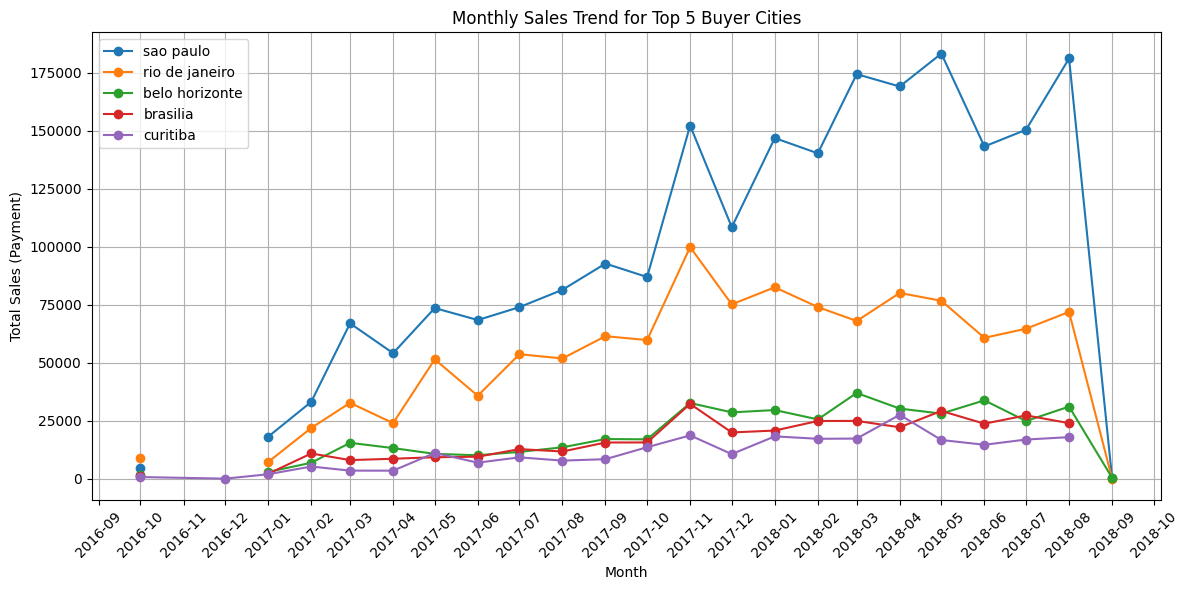

In [70]:
import matplotlib.dates as mdates

plt.figure(figsize=(12, 6))
for city in top_cities:
    plt.plot(pivot_df.index.to_timestamp(), pivot_df[city], marker='o', label=city)

plt.title('Monthly Sales Trend for Top 5 Buyer Cities')
plt.xlabel('Month')
plt.ylabel('Total Sales (Payment)')
plt.legend()
plt.grid(True)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Thre was a general uptrend for monthly sales revenue for ecommerce in brazil in the top 5 cities

In the time period between between 2017-10 and 2018-01 there was a sharp spike in monthly sales.

In [71]:
#investigating variances seen between 2017-10 and 2018-01

df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])

# Filter to delivered orders and desired date range
mask = (
    (df_orders['order_status'] == 'delivered') &
    (df_orders['order_purchase_timestamp'] >= '2017-10-01') &
    (df_orders['order_purchase_timestamp'] <= '2018-01-31')
)
df_orders['order_purchase_date'] = df_orders['order_purchase_timestamp'].dt.date

daily_sales = df_orders[mask].groupby('order_purchase_date')['total_payment'].sum().reset_index()
daily_sales.head()

,order_purchase_date,total_payment
0,2017-10-01,21048.67
1,2017-10-02,24937.45
2,2017-10-03,29647.50
3,2017-10-04,24518.81
4,2017-10-05,28373.15


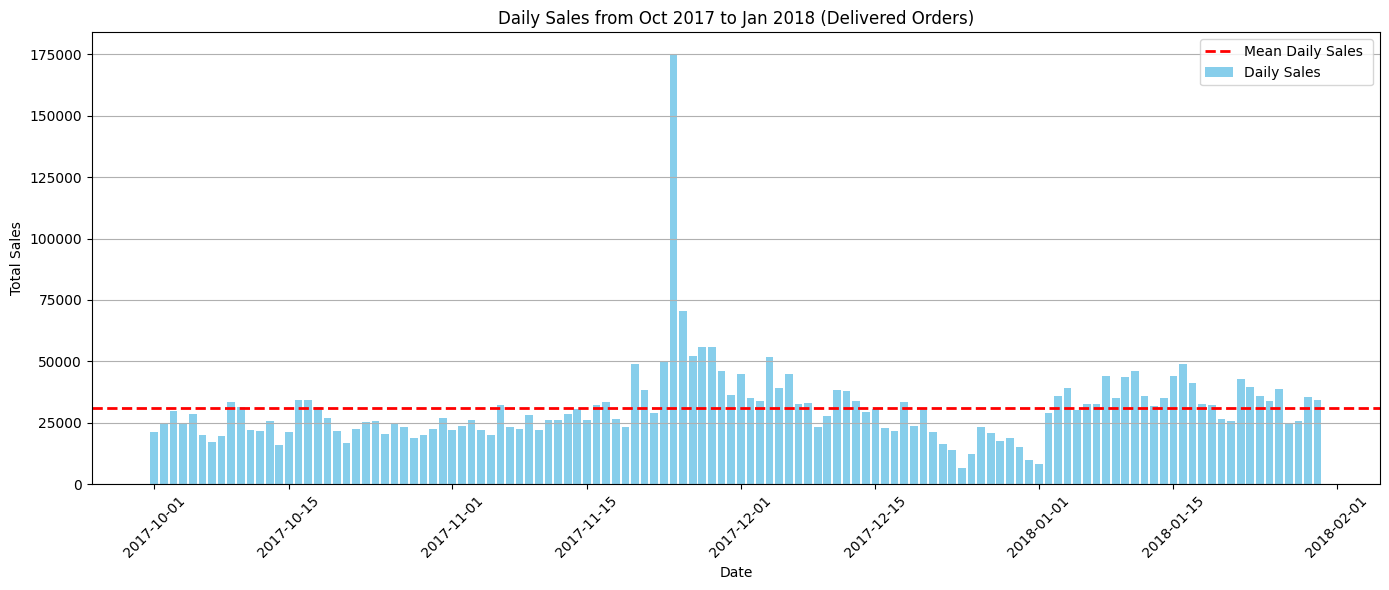

In [72]:
start_date = pd.to_datetime('2017-10-01')
end_date = pd.to_datetime('2018-01-31')
num_days = (end_date - start_date).days + 1  # inclusive of both start and end
filtered_orders = df_orders[mask]
mean_daily_sales = filtered_orders['total_payment'].sum() / num_days

plt.figure(figsize=(14, 6))
plt.bar(daily_sales['order_purchase_date'], daily_sales['total_payment'], color='skyblue', label='Daily Sales', zorder=1)
plt.axhline(mean_daily_sales, color='red', linestyle='--', linewidth=2, label=f'Mean Daily Sales ', zorder=2)
plt.title('Daily Sales from Oct 2017 to Jan 2018 (Delivered Orders)')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(axis='y', zorder=0)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

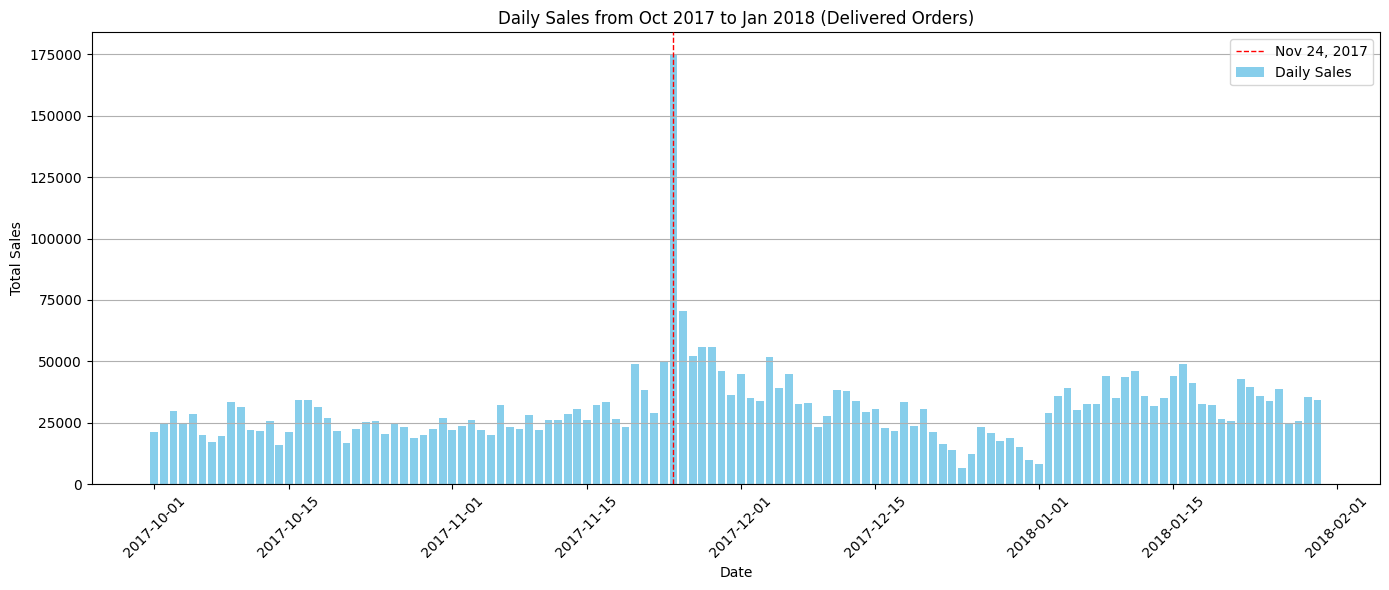

In [73]:
import datetime
nov_24 = datetime.date(2017, 11, 24) 
nov_24_sales = daily_sales[daily_sales['order_purchase_date'] == nov_24]

plt.figure(figsize=(14, 6))
plt.bar(daily_sales['order_purchase_date'], daily_sales['total_payment'], color='skyblue', label='Daily Sales', zorder=1)
plt.axvline(nov_24, color='red', linestyle='--', linewidth=1, label='Nov 24, 2017', zorder=5)
plt.title('Daily Sales from Oct 2017 to Jan 2018 (Delivered Orders)')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Comments:

Nov 24th was black friday in brazil for year 2017, so there was a significant increase in sales in the middle of this time period between 2017-10 and 2018-01 

In [74]:
#Recall that there are multiple latitude longtitude per zip code. So mean of longtitude latitude is used instead

zip_centroids = df_geolocation_land.groupby('geolocation_zip_code_prefix').agg({
    'geolocation_lat': 'mean',
    'geolocation_lng': 'mean'
}).reset_index()

#filter only delivered orders
delivered_orders = df_orders[df_orders['order_status'] == 'delivered']

In [75]:
delivered_orders.columns

Index(['pk_order_sid', 'fk_customer_sid', 'fk_order_purchased_date_sid',
       'fk_order_approved_at_date_sid', 'fk_order_delivered_carrier_date_sid',
       'fk_order_delivered_customer_date_sid',
       'fk_order_estimated_delivery_date_sid', 'order_status', 'total_payment',
       'order_amt', 'freight_amt', 'total_order_amt_wf_freight', 'balance_amt',
       'payment_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'load_date', 'order_purchase_date'],
      dtype='object')

In [76]:
df_customers.columns

Index(['pk_customer_sid', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'load_date'],
      dtype='object')

In [77]:
#Recall that there are multiple latitude longtitude per zip code. So mean of longtitude latitude is used instead

zip_centroids = df_geolocation_land.groupby('geolocation_zip_code_prefix').agg({
    'geolocation_lat': 'mean',
    'geolocation_lng': 'mean'
}).reset_index()

#filter only delivered orders
delivered_orders = df_orders[df_orders['order_status'] == 'delivered']
#merge to get customer zip_code
orders_with_zip = pd.merge(delivered_orders, df_customers[['pk_customer_sid', 'customer_zip_code_prefix']], how='left',    left_on='fk_customer_sid', right_on='pk_customer_sid')

# Merge with centroids 
orders_with_geo = pd.merge(
    orders_with_zip,
    zip_centroids,
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix'
)
geo_sales_heatmap = orders_with_geo.groupby(['geolocation_lat', 'geolocation_lng'])['total_payment'].sum().reset_index()
geo_sales_heatmap.head()


,geolocation_lat,geolocation_lng,total_payment
0,-33.689890,-53.458838,908.16
1,-33.520250,-53.356689,2049.67
2,-32.561073,-53.378161,1242.01
3,-32.235602,-53.078475,457.84
4,-32.193451,-52.179281,35.09


In [78]:
geo_sales_heatmap.max()

geolocation_lat        3.843299
geolocation_lng      -34.799347
total_payment      24846.110000
dtype: float64

In [79]:
geo_sales_heatmap.min()

geolocation_lat   -33.689890
geolocation_lng   -72.668821
total_payment      17.640000
dtype: float64

brazil's longtitude range is -74 to -34

Latitude: from -34 to +5

setting limits for longtitude and latitude in heatmap plot

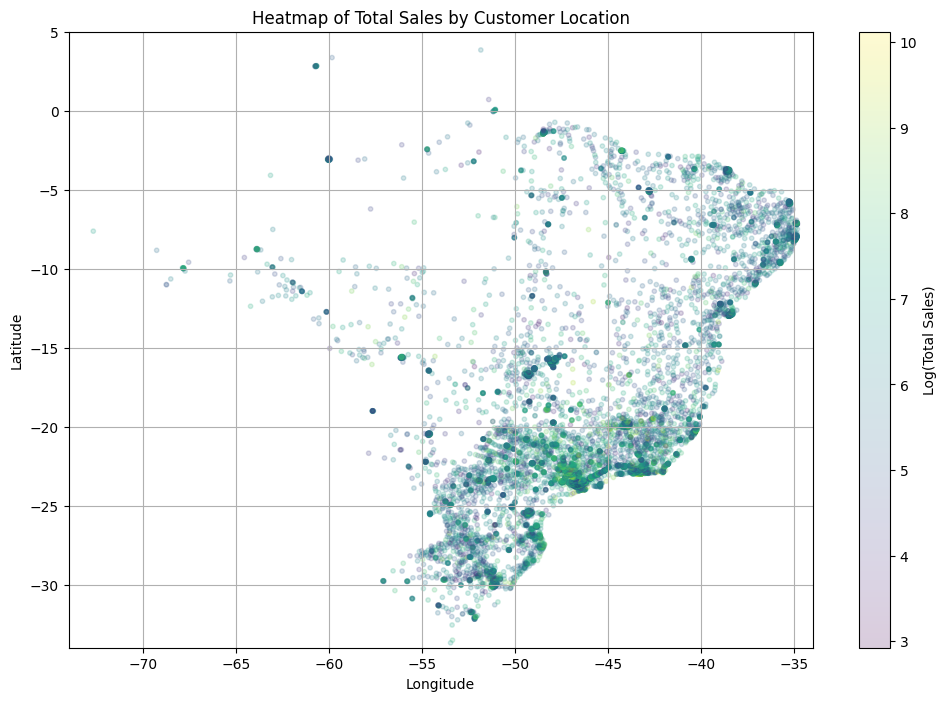

In [80]:
plt.figure(figsize=(12, 8))

scatter = plt.scatter(
    geo_sales_heatmap['geolocation_lng'],
    geo_sales_heatmap['geolocation_lat'],
    c=np.log1p(geo_sales_heatmap['total_payment']),
    s=10,
    alpha=0.2
)

plt.colorbar(scatter).set_label('Log(Total Sales)')

plt.title('Heatmap of Total Sales by Customer Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Brazil boundary for longtitude and latitude
plt.xlim([-74, -34])
plt.ylim([-34, 5])

plt.grid(True)
plt.show()

This heatmap is the heatmap of customers in brazil, which plots longtitude vs latitude vs total sales.

The intensity or shades of color indicate a higher number of sales in that area.

As we can see from the heatap. a lot of dots are concentrated at south west of Brazil.

log(1+ sales) is used instead to make differences more visually distinct.

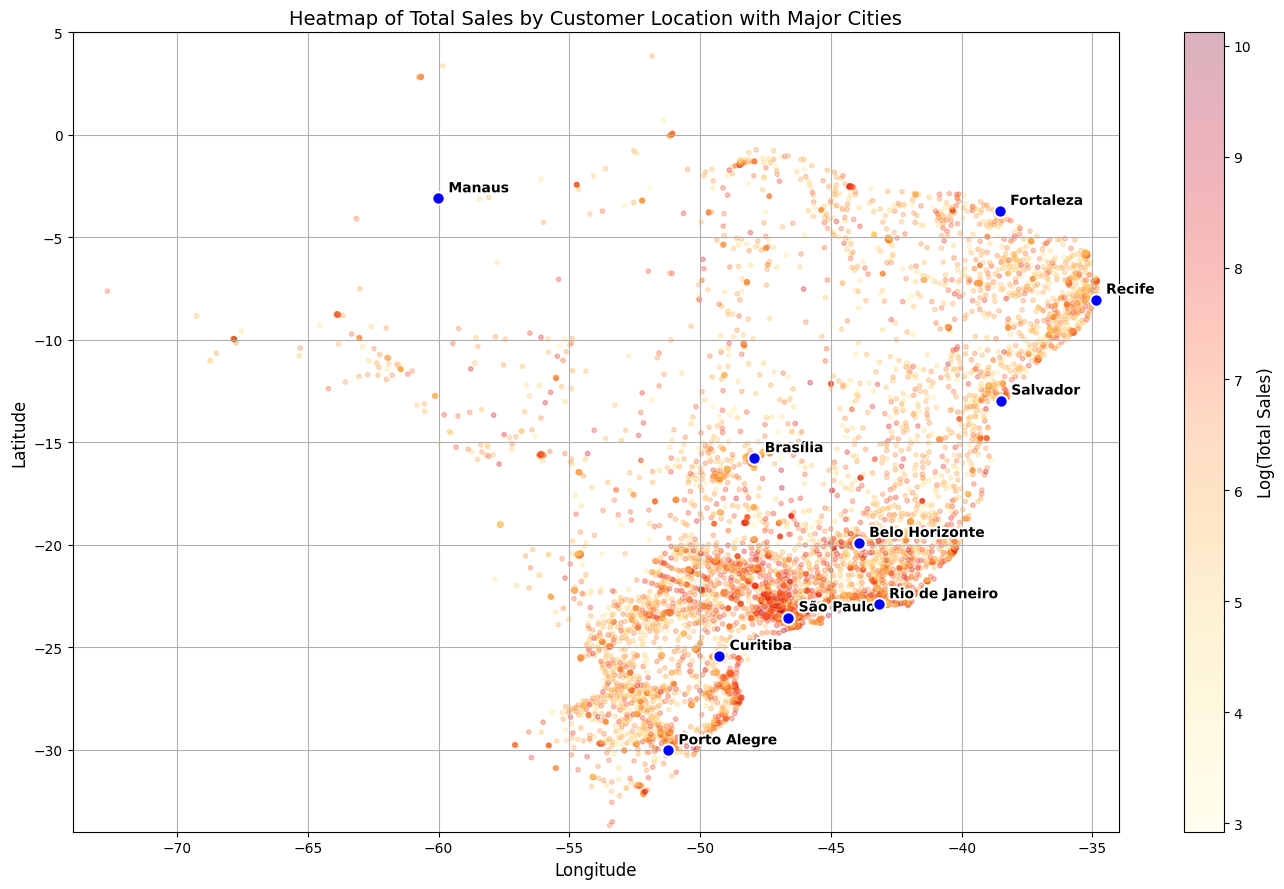

In [81]:

import matplotlib.patheffects as pe

brazil_cities = {
    'São Paulo': (-46.6333, -23.5505),
    'Rio de Janeiro': (-43.1729, -22.9068),
    'Brasília': (-47.9292, -15.7801),
    'Salvador': (-38.5011, -12.9714),
    'Fortaleza': (-38.5433, -3.7172),
    'Manaus': (-60.0258, -3.1019),
    'Curitiba': (-49.2731, -25.4284),
    'Recife': (-34.8770, -8.0476),
    'Porto Alegre': (-51.2300, -30.0346),
    'Belo Horizonte': (-43.9345, -19.9167)
}

plt.figure(figsize=(14, 9))

# heatmap of sales
scatter = plt.scatter(
    geo_sales_heatmap['geolocation_lng'],
    geo_sales_heatmap['geolocation_lat'],
    c=np.log1p(geo_sales_heatmap['total_payment']),
    cmap='YlOrRd',
    s=10,
    alpha=0.3
)


plt.colorbar(scatter).set_label('Log(Total Sales)', fontsize=12)
plt.title('Heatmap of Total Sales by Customer Location with Major Cities', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.xlim([-74, -34])
plt.ylim([-34, 5])
plt.grid(True)

# Mark cities
for city, (lon, lat) in brazil_cities.items():
    plt.scatter(lon, lat, color='blue', marker='o', s=80, edgecolors='white', linewidths=1.5, zorder=5)
    plt.text(
        lon + 0.4, lat + 0.3, city,
        fontsize=10,
        color='black',
        weight='bold',
        path_effects=[pe.withStroke(linewidth=3, foreground="white")]
    )

plt.tight_layout()
plt.show()

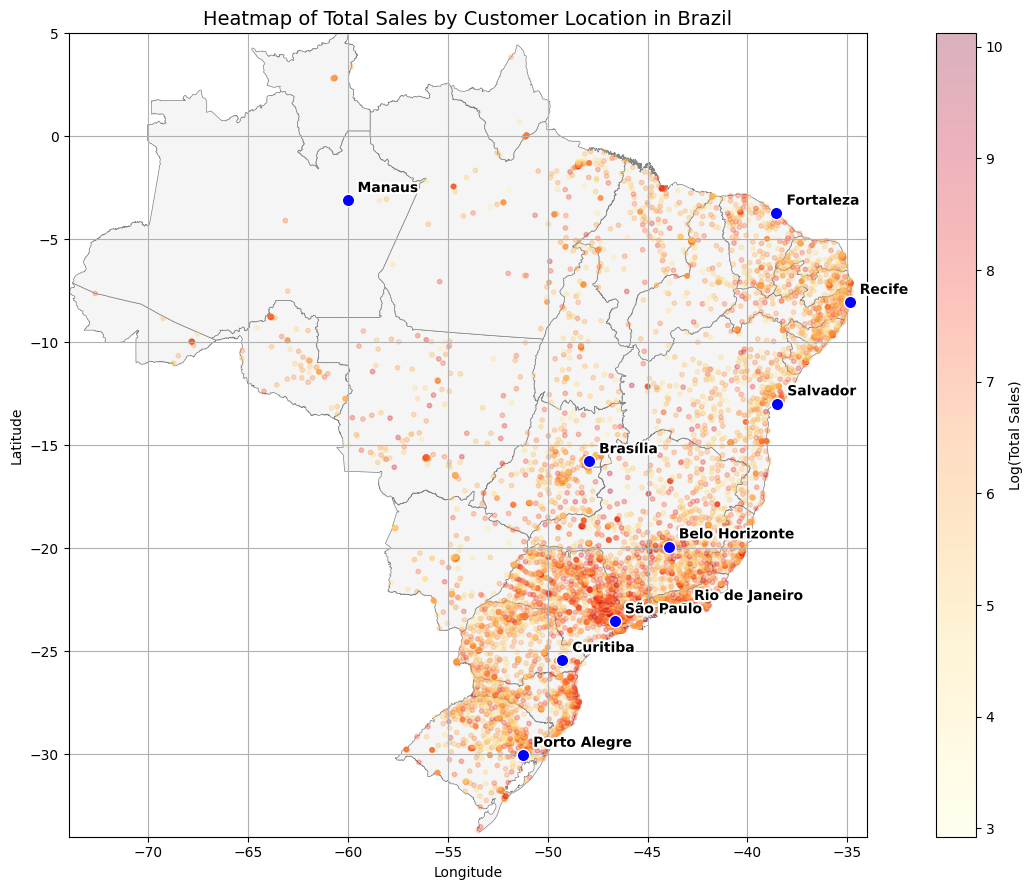

In [82]:
import matplotlib.patheffects as pe

# Load Brazil GeoJSON
brazil = gpd.read_file("brazil-states.geojson")

fig, ax = plt.subplots(figsize=(14, 9))

# Plot Brazil state boundaries
brazil.plot(ax=ax, color='whitesmoke', edgecolor='grey', linewidth=0.5, zorder=0)

scatter = ax.scatter(
    geo_sales_heatmap['geolocation_lng'],
    geo_sales_heatmap['geolocation_lat'],
    c=np.log1p(geo_sales_heatmap['total_payment']),
    cmap='YlOrRd',
    s=10,
    alpha=0.3,
    zorder=1
)
plt.colorbar(scatter, ax=ax, label='Log(Total Sales)')

# Plot major cities
brazil_cities = {
    'São Paulo': (-46.6333, -23.5505),
    'Rio de Janeiro': (-43.1729, -22.9068),
    'Brasília': (-47.9292, -15.7801),
    'Salvador': (-38.5011, -12.9714),
    'Fortaleza': (-38.5433, -3.7172),
    'Manaus': (-60.0258, -3.1019),
    'Curitiba': (-49.2731, -25.4284),
    'Recife': (-34.8770, -8.0476),
    'Porto Alegre': (-51.2300, -30.0346),
    'Belo Horizonte': (-43.9345, -19.9167)
}
for city, (lon, lat) in brazil_cities.items():
    ax.scatter(lon, lat, color='blue', edgecolor='white', s=80, zorder=2)
    ax.text(lon + 0.5, lat + 0.4, city,
            fontsize=10, color='black', weight='bold',
            path_effects=[pe.withStroke(linewidth=3, foreground="white")],
            zorder=3)

ax.set_title("Heatmap of Total Sales by Customer Location in Brazil", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_xlim([-74, -34])
ax.set_ylim([-34, 5])
plt.grid(True)
plt.tight_layout()
plt.show()

This heatmap is the heatnap of sales of customers in brazil with city names, country boundaries. 

You will notice more red dots at south west of brazil

A high concentration of the customers orders come from Sao paulo. 

In [83]:
df_orders_full.columns

Index(['pk_order_sid', 'fk_customer_sid', 'fk_order_purchased_date_sid',
       'fk_order_approved_at_date_sid', 'fk_order_delivered_carrier_date_sid',
       'fk_order_delivered_customer_date_sid',
       'fk_order_estimated_delivery_date_sid', 'order_status', 'total_payment',
       'order_amt', 'freight_amt', 'total_order_amt_wf_freight', 'balance_amt',
       'payment_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'load_date_x', 'pk_customer_sid',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'load_date_y', 'fk_order_sid', 'pk_order_item_id',
       'price', 'product_category_name_english', 'profit'],
      dtype='object')

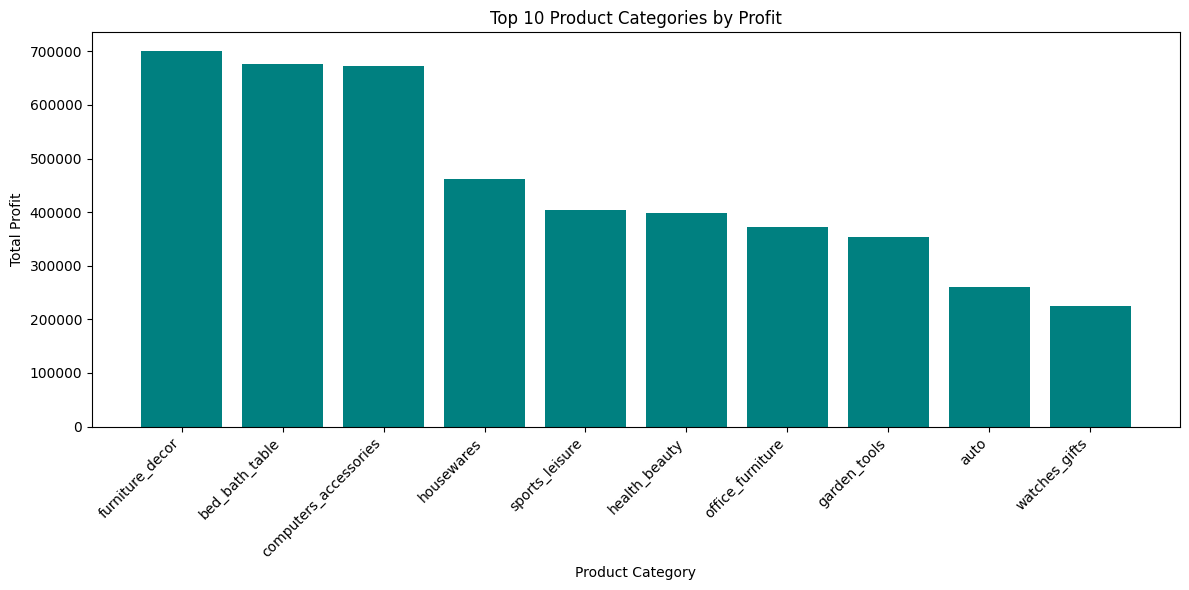

In [85]:

# Group by category and sum profit
category_profit = df_orders_full.groupby('product_category_name_english')['profit'].sum().reset_index()

#top 10 ctageories
top10_cat_profit = category_profit.sort_values('profit', ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(12,6))
plt.bar(top10_cat_profit['product_category_name_english'], top10_cat_profit['profit'], color='teal')
plt.xlabel('Product Category')
plt.ylabel('Total Profit')
plt.title('Top 10 Product Categories by Profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This chart shows the top 10 product categories for profit made.(derived column)

This chart shows that furntiture decor, bed bath table and computer accessories yield significantly higher profits.